# Testing models

In [2]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# imoprt seaborn & matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# import KNN from sklearn
from sklearn.neighbors import KDTree

# shows a bigger plot size for readability 
plt.rcParams['figure.figsize'] = (12, 5)

In [4]:
# read 'songDb.tsv' into dataframe with correct encoding  
music = pd.read_csv('songDb.tsv', sep='\t', encoding='ISO-8859-1')

C:\Users\David Soberanis\AppData\Local\Temp\ipykernel_21988\3079004086.py:2: DtypeWarning: Columns (11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  music = pd.read_csv('songDb.tsv', sep='\t', encoding='ISO-8859-1')


# Initial EDA 

In [5]:
# heres a first look at the unaltered music
music.head()


,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre
0,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,audio_features,6J2VvzKwWc2f0JP5RQVZjq,spotify:track:6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/tracks/6J2VvzKwWc2f...,https://api.spotify.com/v1/audio-analysis/6J2V...,282920.0,4.0,celticmetal
1,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,audio_features,4HA34COgxgVJ6zK88UN4Ik,spotify:track:4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/tracks/4HA34COgxgVJ...,https://api.spotify.com/v1/audio-analysis/4HA3...,300320.0,4.0,celticmetal
2,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,audio_features,3W6Xik6Xxf06JuUoZSATlD,spotify:track:3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/tracks/3W6Xik6Xxf06...,https://api.spotify.com/v1/audio-analysis/3W6X...,175353.0,4.0,celticmetal
3,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,audio_features,2gGveBaLJQMtJ43X4UL5kH,spotify:track:2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/tracks/2gGveBaLJQMt...,https://api.spotify.com/v1/audio-analysis/2gGv...,272292.0,4.0,celticmetal
4,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,audio_features,1lRF81A1C9QoCgBcEop2zg,spotify:track:1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/tracks/1lRF81A1C9Qo...,https://api.spotify.com/v1/audio-analysis/1lRF...,237933.0,4.0,celticmetal


In [6]:
# basics statistics for music
music.describe() 

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Duration_ms
count,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,1.315800e+05
mean,0.553784,0.648783,5.311356,-8.523482,0.618985,0.083736,0.270991,0.231870,0.193345,0.493751,2.536664e+05
std,0.182683,0.255634,3.570006,4.789160,0.485626,0.101581,0.323490,0.353740,0.162596,1.799546,1.256204e+05
min,0.000000,0.000000,-14.372000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00
25%,0.432000,0.487000,2.000000,-10.377000,0.000000,0.035900,0.007930,0.000002,0.095100,0.247000,1.909330e+05
50%,0.566000,0.690000,5.000000,-7.377000,1.000000,0.048300,0.105000,0.001480,0.125000,0.459000,2.290000e+05
75%,0.692000,0.853000,9.000000,-5.344000,1.000000,0.083000,0.487000,0.503000,0.246000,0.683000,2.854792e+05
max,0.988000,11.000000,11.000000,5.056000,1.000000,0.966000,0.996000,0.999000,1.000000,187.827000,5.949886e+06


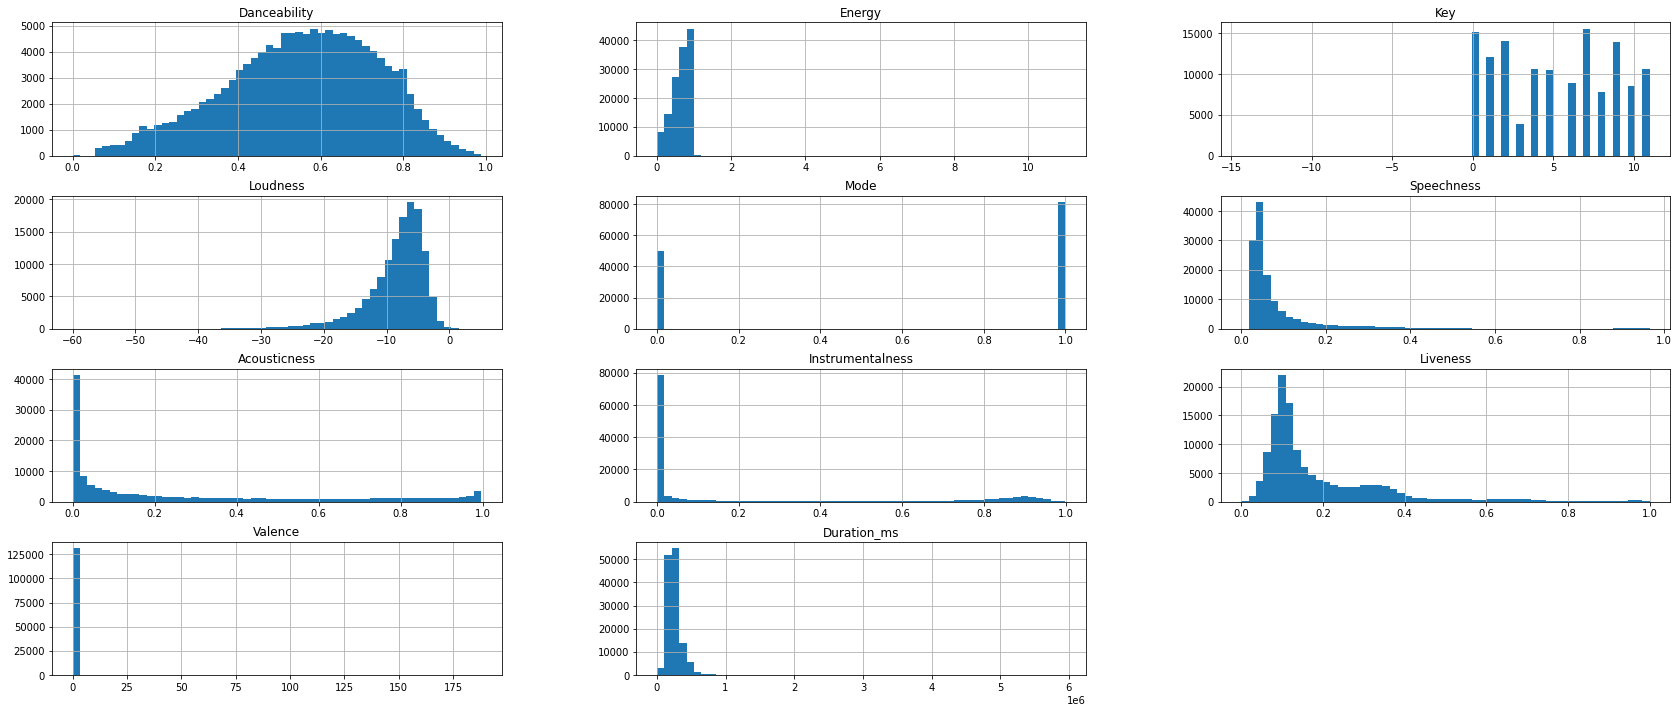

In [7]:
# shows a hist of all quantitive features 
#  need to format this better
plt.rcParams['figure.figsize'] = (29, 12) # increase size 
hist = music.hist(bins=55)

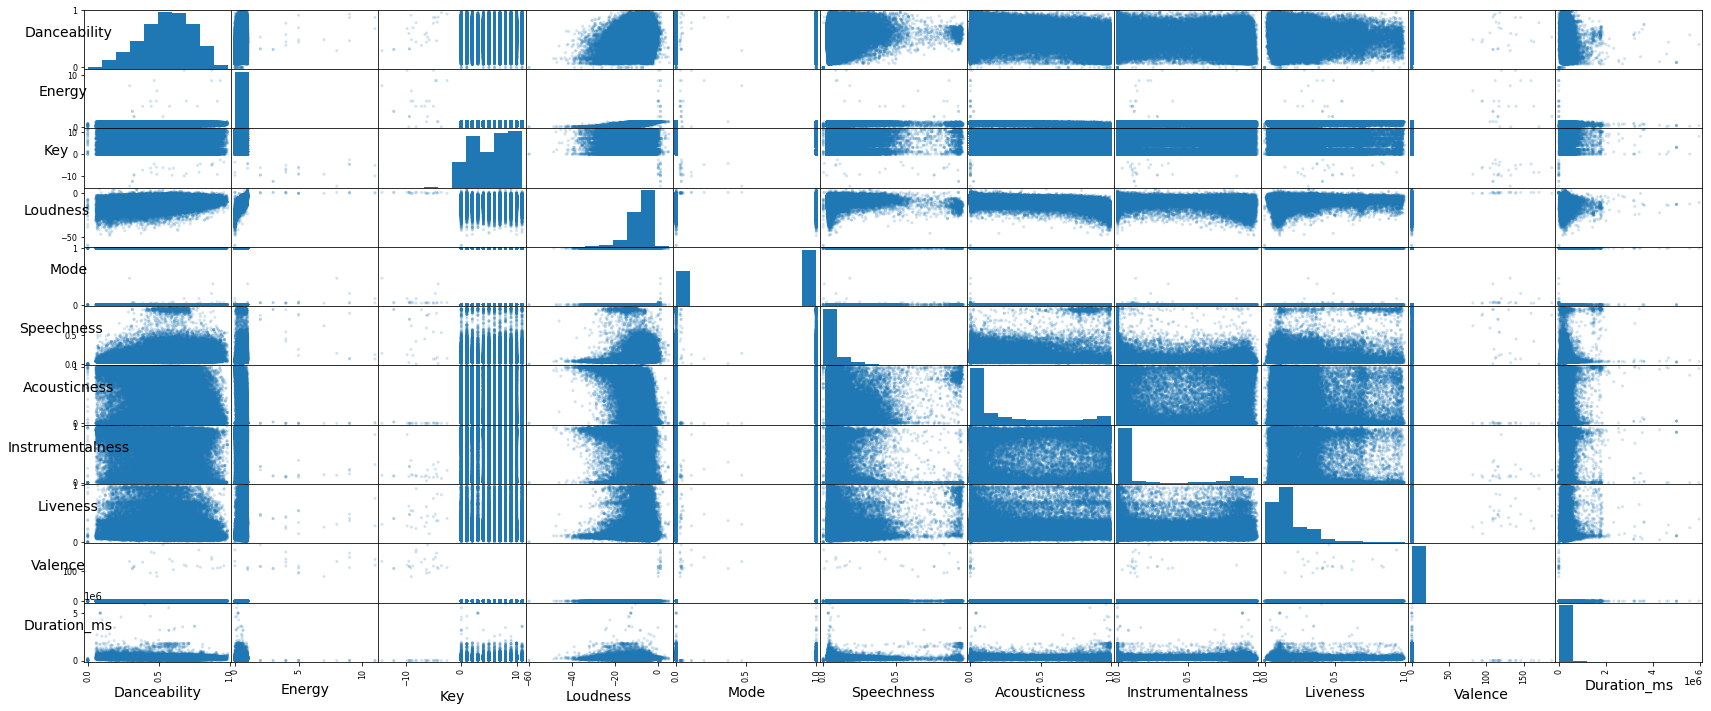

In [8]:
# We are using a scatter plot matrix to quickly see if there are any correlations in the data 
# shows a bigger plot size for readability 
plt.rcParams['figure.figsize'] = (29, 12)

# make a sub_music to exclude non quantitive columns from matrix 
sub_music =  music[['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Duration_ms']]
sub_music

fig = pd.plotting.scatter_matrix(sub_music, alpha=0.2, figsize=(29,12)) 

for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 14, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 14, rotation = 0)

# Missing Data

In [9]:
# Calculate % of missing values in each column:
music.isna().mean()

Name                0.000015
Danceability        0.000000
Energy              0.000000
Key                 0.000000
Loudness            0.000000
Mode                0.000000
Speechness          0.000000
Acousticness        0.000000
Instrumentalness    0.000000
Liveness            0.000000
Valence             0.000000
Tempo               0.000000
Type                0.000000
ID                  0.000000
Uri                 0.000000
Ref_Track           0.000000
URL_features        0.000000
Duration_ms         0.000000
time_signature      0.000000
Genre               0.000198
dtype: float64

- As we can see the only column with a significant amount of missing data is Genre at 0.000198. We just need to drop rows with these missing genres 

In [10]:
# there are only 28 rows with missing data that is super low.
music.isna().sum().sum()

28